<a href="https://colab.research.google.com/github/shubham-hub/Play-Store-Analysis/blob/main/Capstone_Project_1_Shubham_Chavhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Import the required libraries**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

## **Mount Google Drive**


In [2]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Getting data from CSV file using Pandas**


In [3]:
#Creating dataframes for both playstore data as well as user reviews data
df_play_store = pd.read_csv('/content/drive/MyDrive/Play_Store_Project/Play Store Data.csv')
df_user_review = pd.read_csv('/content/drive/MyDrive/Play_Store_Project/User Reviews.csv')

### We have two sets of data. One contains data of Play Store apps while the another dataset contains customer reviews of the android apps.We stored them in variables **'df_play_store'** and **'df_user_review'** respectively.


## **For first dataframe.**

In [4]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_play_store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device




1. ### Playstore dataset contains information on apps of different catagories with their ratings, size, number of installs, type and lot more like we normally see in our play store. Almost similar to data that are essential for success of any app.
2. ### From this we can come to a point that primary measure check success of any app is the number of installs.While factors affecting success like reviews, rating and other are important.

## **1. Let's check basic information of play store data for different apps.**

In [6]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



###Rating column contains mostly null values. Will have to deal with those and other columns too.

## **2. Let's handle duplicates present in dataset**

In [7]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Check for duplicate rows 
df_play_store[df_play_store.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [9]:
df_play_store['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
Weather by WeatherBug: Forecast, Radar & Alerts      1
Free Foreclosure Real Estate Search by USHUD.com     1
Star Chart                                           1
ChopAssistant                                        1
Five Nights at Freddy's 4                            1
Name: App, Length: 9660, dtype: int64

### From the above value counts by app name, we can see there are duplicate rows for a some applications.
### Now checking if those rows for same app is identical or not.

In [10]:
# Checking if those rows for same app is identical or not
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


### From the above observation we can see there might be duplicate rows present for same app. For different category of same app there are different number of reviews. 

### Keeping the Highest number of review and discarding other rows.

In [11]:
#droping duplicated values by app and category
df_play_store = df_play_store.sort_values('Reviews', ascending=False).drop_duplicates(['App', 'Category'])

In [12]:
# Checking if those rows for same app dropped or not
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [13]:
# Check for duplicate rows
df_play_store[df_play_store.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
# The total number of apps
print('Total number of apps in the file = ', len(list(df_play_store['App'].unique())))

Total number of apps in the file =  9660


## **3. Let's handle missing/null values**

In [15]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### Rating column has most null values but cannot remove them all. 
### We will drop the rows of current ver, android ver, content rating and type which contain null values.
### We have to handle null values of  rating.


In [16]:
# get null values count column wise
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
# Drop the rows of current ver and android ver which contain null values.
df_play_store.dropna(inplace=True,subset=['Current Ver','Android Ver','Content Rating'])

In [18]:
# instead of removing row of type with the null value we can replace it with Mode (most frequently appeared value for that column)
print(df_play_store['Type'].mode())
df_play_store['Type'].fillna(str(df_play_store['Type'].mode().values[0]),inplace=True)

0    Free
dtype: object


In [19]:
# get null values count column wise
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1460
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### Detecting outliers for rating column and then handling null values of rating coulmn.

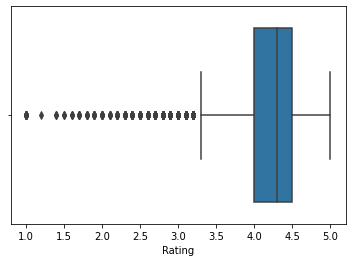

In [20]:
#boxplot for rating 
sns.boxplot(x='Rating',data=df_play_store)
plt.show()

### From boxplot there is no outliers in rating column.
### Replacing the null values of rating column with median.

In [21]:
#defining the function to fill null with median of rating
def inpute_median(series):
  return series.fillna(series.median())

In [22]:
df_play_store.Rating = df_play_store['Rating'].transform(inpute_median)

In [23]:
# get null values count column wise
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## **4. There are many numeric value columns that has Dtype object will change it to numeric.**

In [24]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9734 non-null   object 
 1   Category        9734 non-null   object 
 2   Rating          9734 non-null   float64
 3   Reviews         9734 non-null   object 
 4   Size            9734 non-null   object 
 5   Installs        9734 non-null   object 
 6   Type            9734 non-null   object 
 7   Price           9734 non-null   object 
 8   Content Rating  9734 non-null   object 
 9   Genres          9734 non-null   object 
 10  Last Updated    9734 non-null   object 
 11  Current Ver     9734 non-null   object 
 12  Android Ver     9734 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


###**A) Install column**

In [25]:
# For Install column.
df_play_store['Installs'].value_counts().head()

1,000,000+     1429
100,000+       1114
10,000+        1029
10,000,000+     959
1,000+          887
Name: Installs, dtype: int64

In [26]:
# There are  + symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))

# There are  , symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

# converting string to int type value
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: int(x))

In [27]:
# For Install column.
df_play_store['Installs'].value_counts().head()

1000000     1429
100000      1114
10000       1029
10000000     959
1000         887
Name: Installs, dtype: int64

###**B) Size column**

In [28]:
#For Size column. 
df_play_store.Size.value_counts().head()

Varies with device    1250
11M                    182
12M                    181
13M                    179
14M                    177
Name: Size, dtype: int64

### In **Size column**  we can see that the size is not defined in single unit Both KB and MB are there. So we have to convert those to same unit (KB). 

### Also There are columns with **Varies with device** string. Will be giving zero for app size that varies with device. As size can't be zero so treated as variable size.

In [29]:
# There are size of app present in MB  so converting into KB using lambda function
# There are size of app present in Varies with device so converting into Zero using lambda function

df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('Varies with device', '0' ) if 'Varies with device' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1024 if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('.', '') if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)

# converting all str values to float
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(x))

In [30]:
#For Size column. 
df_play_store.Size.value_counts().head()

0.0        1250
11264.0     182
12288.0     181
13312.0     179
14336.0     177
Name: Size, dtype: int64

###**C) Review column**

###Datatype of Review column is object so converting it into int

In [31]:
#function for converting datatype  
def string_to_integer(string):
  return int(string)

In [32]:
df_play_store['Reviews'] = df_play_store['Reviews'].apply(string_to_integer)

###**D) Price column**

###Datatype of Price column is object so converting it into float, also we have to remove $ sign

In [33]:
#function for converting datatype 
def string_to_float(string):
  if string=='0':
    return 0
  else:
    return float(string[1:])

In [34]:
df_play_store['Price']=df_play_store['Price'].apply(string_to_float)

In [35]:
#For Price column. 
df_play_store.Price.value_counts().head()

0.00    8979
0.99     143
2.99     124
1.99      73
4.99      70
Name: Price, dtype: int64

In [36]:
df_play_store['Price'].describe()

count    9734.000000
mean        1.091498
std        16.787475
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [37]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9734 non-null   object 
 1   Category        9734 non-null   object 
 2   Rating          9734 non-null   float64
 3   Reviews         9734 non-null   int64  
 4   Size            9734 non-null   float64
 5   Installs        9734 non-null   int64  
 6   Type            9734 non-null   object 
 7   Price           9734 non-null   float64
 8   Content Rating  9734 non-null   object 
 9   Genres          9734 non-null   object 
 10  Last Updated    9734 non-null   object 
 11  Current Ver     9734 non-null   object 
 12  Android Ver     9734 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [38]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31744.0,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91.0,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18432.0,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33792.0,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22528.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [39]:
#to reset the index 
df_play_store = df_play_store.reset_index()

In [40]:
df_play_store.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2989,GollerCepte Live Score,SPORTS,4.2,9992,31744.0,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91.0,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18432.0,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33792.0,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22528.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [41]:
df_play_store.describe()

,index,Rating,Reviews,Size,Installs,Price
count,9734.000000,9734.000000,9.734000e+03,9734.000000,9.734000e+03,9734.000000
mean,5756.487056,4.193815,2.383576e+05,18334.393538,8.215745e+06,1.091498
std,3073.664283,0.495037,1.935456e+06,22132.762131,5.530841e+07,16.787475
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3273.250000,4.100000,2.600000e+01,2969.600000,1.000000e+03,0.000000
50%,5913.500000,4.300000,1.020500e+03,9420.800000,1.000000e+05,0.000000
75%,8393.750000,4.500000,3.083850e+04,25600.000000,1.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


###From above description median for rating is 4.3.
### Most of apps are free and  have size between 9 MB to 10 MB.
### **Playstore data looks better. We will analyse each factors affecting our primary factor ('Rating') or measure for success('Installs') in deep.**

#**Exploratory data analysis of playstore dataframe**

##**1. Category Wise App Count**

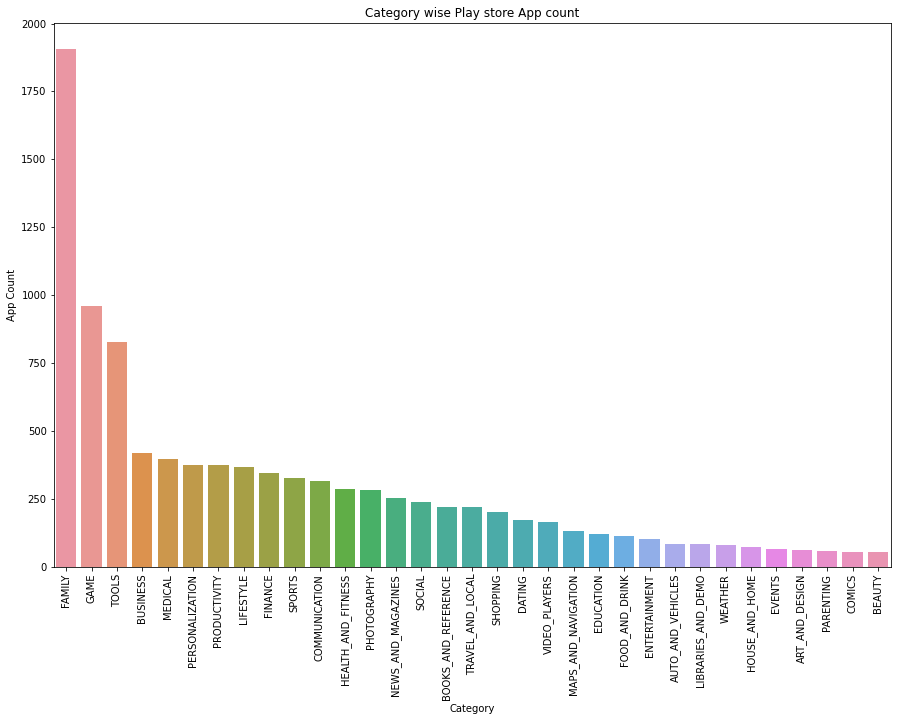

In [42]:
# Each Category wise app count
y = df_play_store['Category'].value_counts()
x = df_play_store['Category'].value_counts().index
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("App Count")

graph = sns.barplot(x = x_axis, y = y_axis)
graph.set_title("Category wise Play store App count");

### From the above bar graph, from every category, we will infer that Category `Family' and 'Games' are the maximum available. Thus we also can expect that those categories have a higher success rate with a higher count rate.

In [43]:
# Getting the top 5 apps with category wise app count
df_play_store.groupby(['Category'])['App'].count().sort_values(ascending=False).head().reset_index()

,Category,App
0,FAMILY,1906
1,GAME,960
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,396


##**2. Comparing Category And App Type (Fee, Paid) by count of installs.**

In [44]:
category_type_wise_no_installs = df_play_store.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_wise_no_installs['log_base_ten_Installs'] = np.log10(category_type_wise_no_installs['Installs'])
category_type_wise_no_installs.head(9)

,Category,Type,Installs,log_base_ten_Installs
0,ART_AND_DESIGN,Free,114317100,8.058111
1,ART_AND_DESIGN,Paid,16000,4.204120
2,AUTO_AND_VEHICLES,Free,53080061,7.724931
3,AUTO_AND_VEHICLES,Paid,50150,4.700271
4,BEAUTY,Free,27197050,7.434522
5,BOOKS_AND_REFERENCE,Free,1665945260,9.221661
6,BOOKS_AND_REFERENCE,Paid,23316,4.367654
7,BUSINESS,Free,696952090,8.843203
8,BUSINESS,Paid,212775,5.327921


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


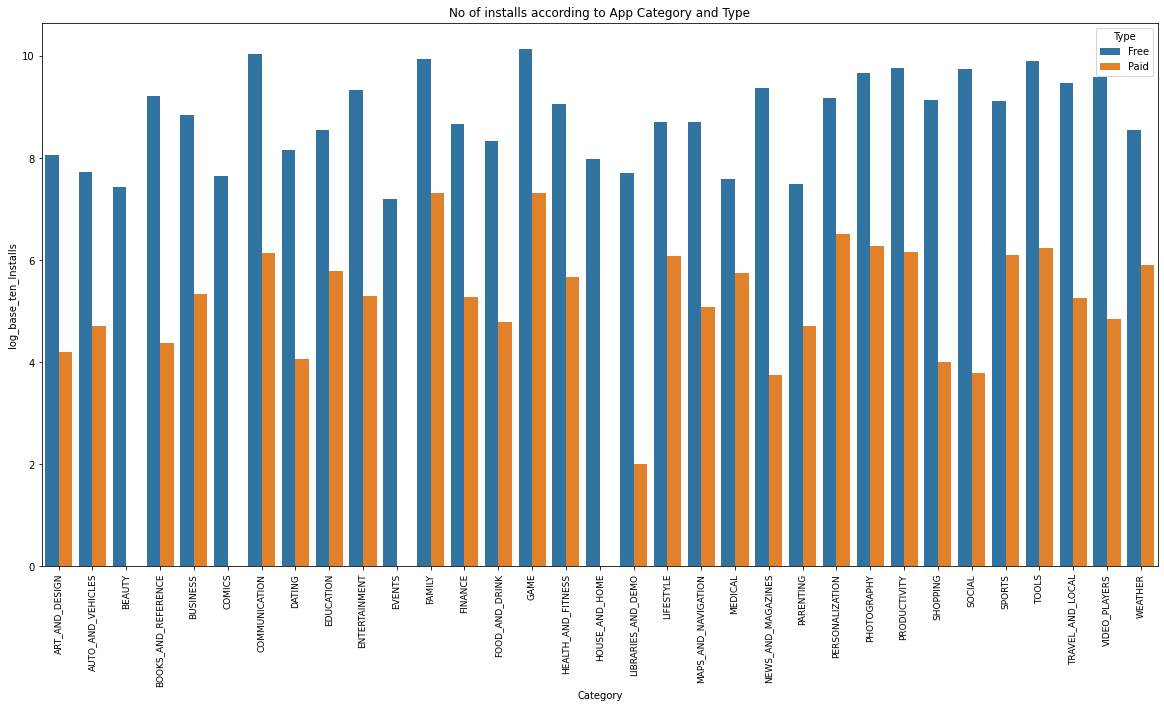

In [45]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=9)

plt.xlabel("App Category(Fee/Paid)")
plt.ylabel("Installation No.")
plt.title("No of installs according to App Category and Type")
sns.barplot('Category', 'log_base_ten_Installs', hue='Type', data=category_type_wise_no_installs);

plt.show()

### From this graph we can deduce that The Game and Family category has the highest number of Installation.

##**3. Category Wise Pricing Visualization.**

In [46]:
group_by_cat_pricing = df_play_store.groupby(['Category'])[['Price']].mean().reset_index()
group_by_cat_pricing.head()

,Category,Price
0,ART_AND_DESIGN,0.094762
1,AUTO_AND_VEHICLES,0.158471
2,BEAUTY,0.000000
3,BOOKS_AND_REFERENCE,0.541946
4,BUSINESS,0.417357


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


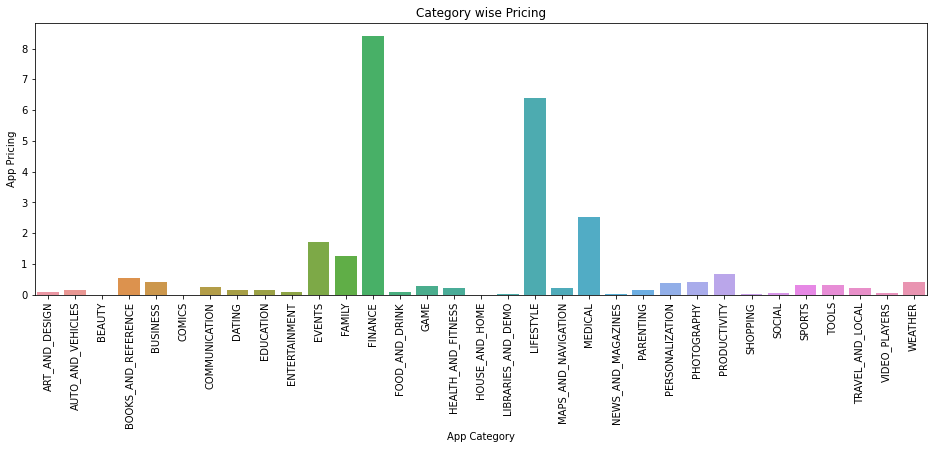

In [47]:
plt.figure(figsize=(16,5))
sns.barplot('Category', 'Price', data=group_by_cat_pricing);
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('App Category')
plt.ylabel('App Pricing')
plt.show()

In [48]:
# Getting the top 5 apps with category wise price count
group_by_cat_pricing.sort_values(by=['Price'],ascending=False).head()

,Category,Price
12,FINANCE,8.408203
18,LIFESTYLE,6.398022
20,MEDICAL,2.514394
10,EVENTS,1.718594
11,FAMILY,1.263825


### We can deduce from this graph that for Finance, Lifestyle and Medical category apps have more pricing.

##**4. Rating visualization of Apps for given Category**

In [49]:
x_rating=df_play_store.groupby('Category').agg({'Rating':'mean'})
x_rating.head()

,Rating
Category,
ART_AND_DESIGN,4.373016
AUTO_AND_VEHICLES,4.205882
BEAUTY,4.283019
BOOKS_AND_REFERENCE,4.334389
BUSINESS,4.173810


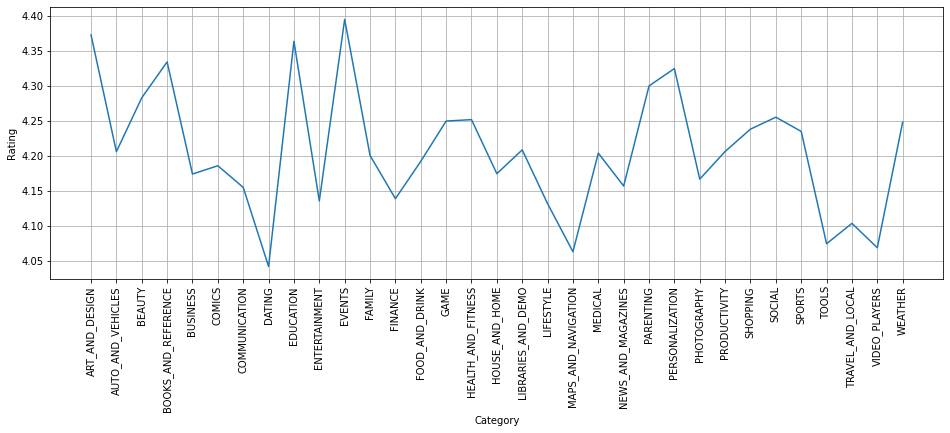

In [50]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Category',y='Rating',data=x_rating)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### We can deduce from this graph that Dating, Maps and Navigation, Tools, Travel & Local, Video Player category have the lowest Ratings from the user.


## **5. Review Visualization of Apps for given Category.**

In [51]:
x_review=df_play_store.groupby('Category').agg({'Reviews':'mean'})
x_review.head()

,Reviews
Category,
ART_AND_DESIGN,22526.412698
AUTO_AND_VEHICLES,13690.188235
BEAUTY,7476.226415
BOOKS_AND_REFERENCE,75669.072398
BUSINESS,23550.054762


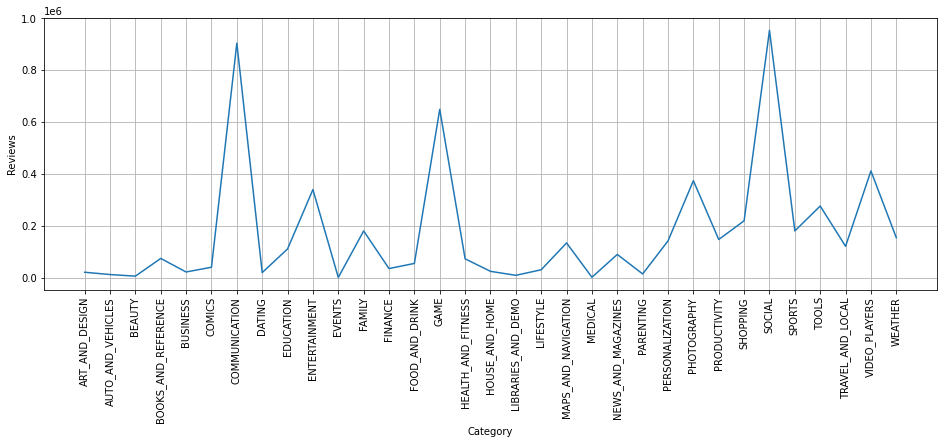

In [52]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Category',y='Reviews',data=x_review)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### We can deduce from this graph that Communication, Game and Social category of Apps got most number of reviews.

##**6. Number of Installed Applications for every Category.**

In [53]:
applications_category_count = df_play_store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
applications_category_installs = df_play_store.groupby(['Category'])[['Installs']].sum()
category_installs = pd.merge(applications_category_count, applications_category_installs, on='Category')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


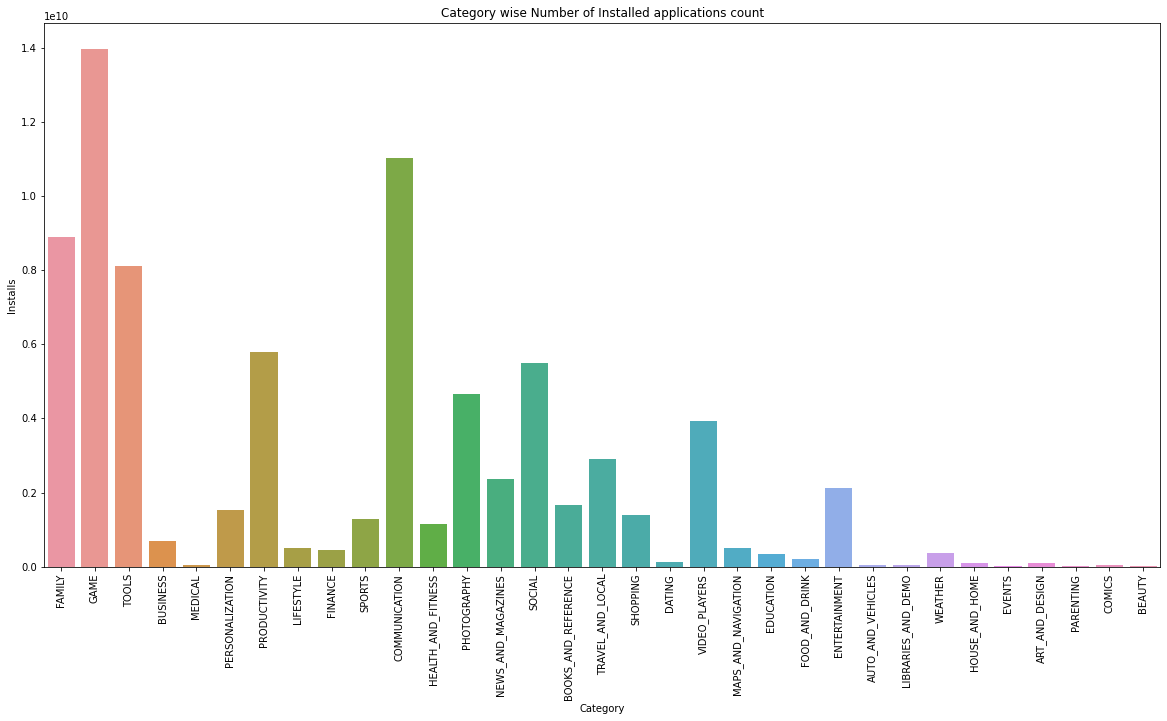

In [54]:
#  Number of installed application for each category.
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category wise Number of Installed applications count")
sns.barplot(category_installs.Category, category_installs.Installs)

In [55]:
# Getting the top 5 apps with number of install
category_installs.sort_values(by=['Installs'],ascending=False).head()

,Category,Count,Installs
1,GAME,960,13963924415
10,COMMUNICATION,316,11039276251
0,FAMILY,1906,8885582405
2,TOOLS,827,8102271905
6,PRODUCTIVITY,374,5793091369


### Games, Communication and Tools category have the maximum Number of apps installed.

##**7. Total Number of Apps based on Type (Paid/Free).**

In [56]:
df_play_store['Type'].value_counts('Free')*100

Free    92.243682
Paid     7.756318
Name: Type, dtype: float64

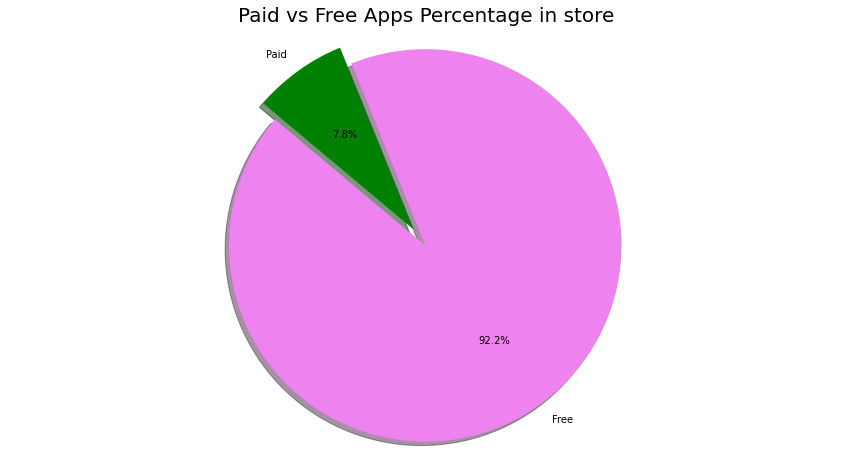

In [58]:
# Data to plot (#Final code for pie chart)
labels = 'Free', 'Paid'
sizes = [92.24,7.76]
colors = ["violet","green"]
explode = (0.1, 0 )  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,)

plt.axis('equal')
plt.title('Paid vs Free Apps Percentage in store',size =20)
plt.show()
plt.rcParams['figure.figsize'] = (15,8)

## **8. Distribution of the Ratings of all the Applications.**

In [59]:
# Genre wise count
highest_genres = df_play_store.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
highest_genres.head(3)

,Genres,Count
0,Tools,826
1,Entertainment,578
2,Education,518


In [60]:
#Genre wise count
summed_genres_installs = df_play_store.groupby(['Genres'])[['Installs']].sum()
summed_genres_installs.head(3)

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,68020500
Adventure,296695320


In [61]:
top_genres_installs = pd.merge(highest_genres, summed_genres_installs, on='Genres')
genres_ratings_means = df_play_store.groupby(['Genres'])[['Rating']].mean()
genre_wise_all_installs_ratings = pd.merge(top_genres_installs, genres_ratings_means, on='Genres')
genre_wise_all_installs_ratings.head(3)

,Genres,Count,Installs,Rating
0,Tools,826,8092271905,4.073487
1,Entertainment,578,4338704684,4.121107
2,Education,518,307410048,4.294015


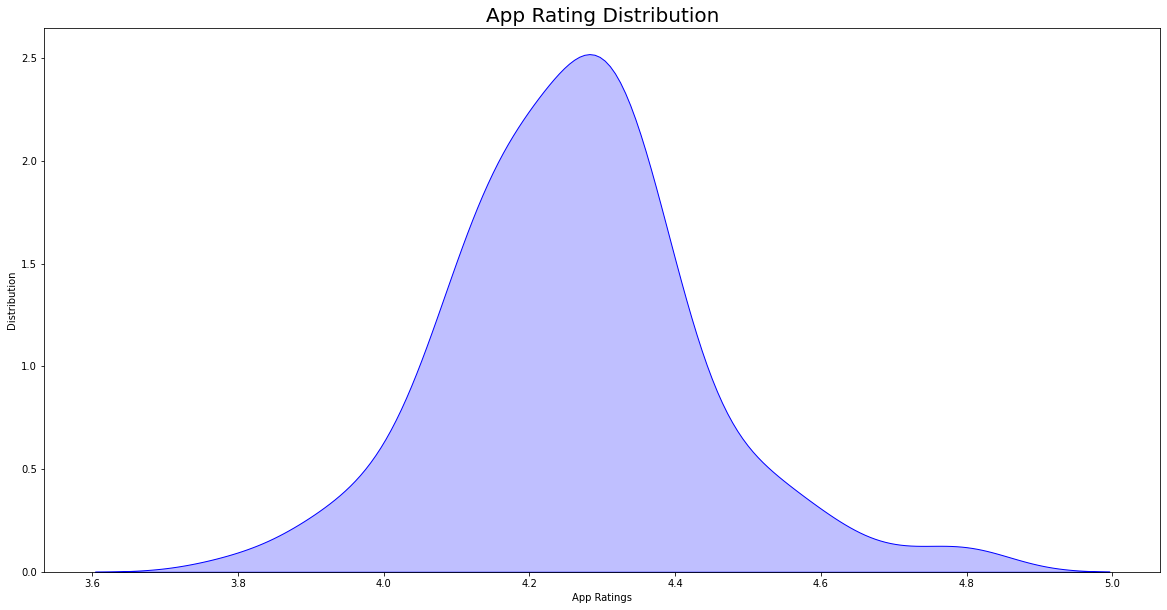

In [62]:
#distribution plot for ratings
plt.figure(figsize=(20,10))
g = sns.kdeplot(genre_wise_all_installs_ratings.Rating, color="BLUE", shade = True)
g.set_xlabel("App Ratings")
g.set_ylabel("Distribution")
plt.title('App Rating Distribution',size = 20)
plt.show()

### So we can see Average rating of an application in playstore is around **4.2**

## **9. Graph of Revenue for given Apps**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


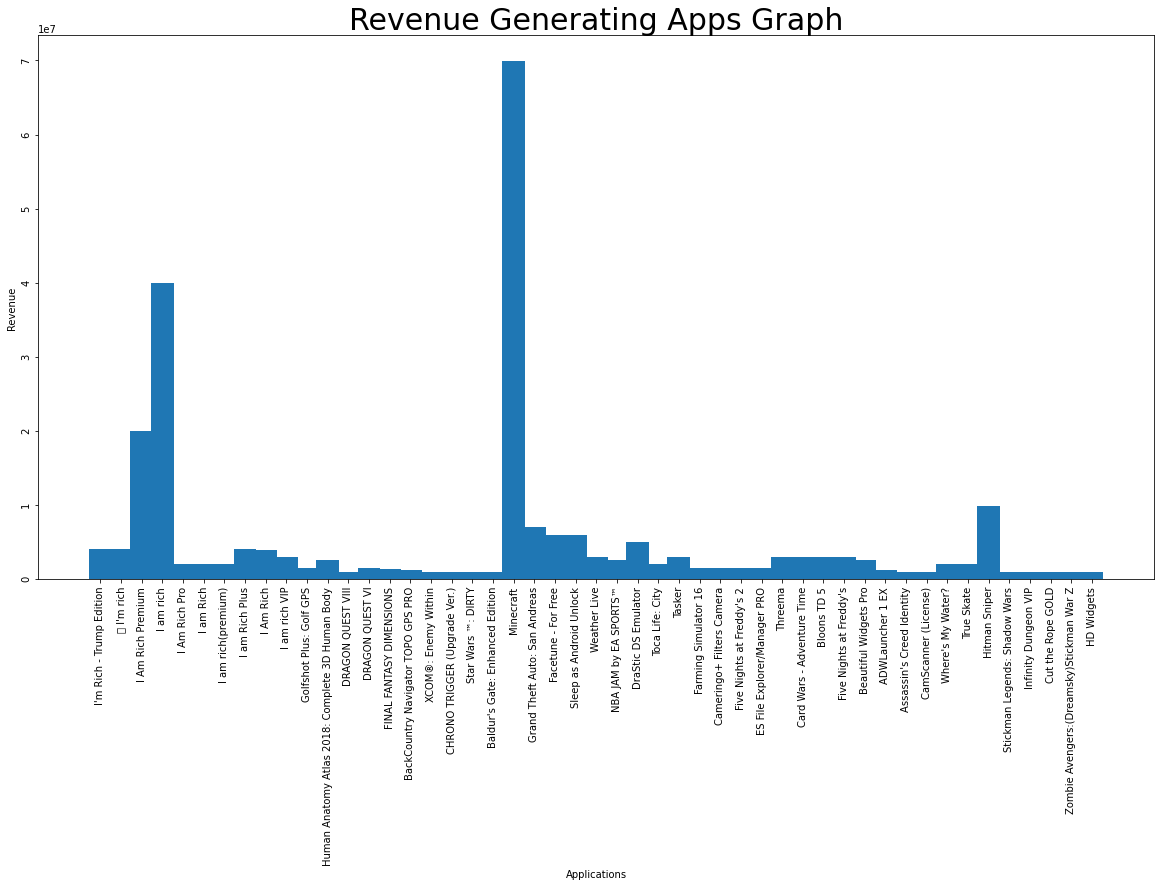

In [63]:
# So Revenue = App Amount to be paid * Numbe of installs
all_paid_apps = df_play_store[df_play_store['Type'] == 'Paid']

rev_df = all_paid_apps[['App', 'Installs', 'Price']]

rev_df['Revenue'] = rev_df['Installs'] * rev_df['Price']

# sorting top 50
earning_df_sort_by_rev = rev_df.sort_values(by='Revenue', ascending=False).head(50)
earning_df_sort_by_price = earning_df_sort_by_rev.sort_values(by='Price', ascending=False)

# plotting the graph
plt.figure(figsize=(20,10))
plt.bar(earning_df_sort_by_price.App, earning_df_sort_by_price.Revenue, width=1.1, label=earning_df_sort_by_price.Revenue)
plt.xlabel("Applications")
plt.ylabel("Revenue")
plt.tick_params(rotation=90)
plt.title("Revenue Generating Apps Graph",size=30)
plt.show()

In [64]:
#top 5 apps by revenue
earning_df_sort_by_rev.head()

,App,Installs,Price,Revenue
5546,Minecraft,10000000,6.99,69900000.0
3929,I am rich,100000,399.99,39999000.0
6646,I Am Rich Premium,50000,399.99,19999500.0
3327,Hitman Sniper,10000000,0.99,9900000.0
3991,Grand Theft Auto: San Andreas,1000000,6.99,6990000.0


In [65]:
most_pricey_app= df_play_store['App'][df_play_store.Price==df_play_store['Price'].max()].iloc[0]
print(f'The most pricey app on playstore is\n{most_pricey_app}')

The most pricey app on playstore is
I'm Rich - Trump Edition


### From given graph we can see that **Minecraft** is generating highest Revenue among all.
### The most pricey app on playstore is - **I'm Rich - Trump Edition**.
### So we can say The Highest Revenue generating app doesnt mean it have to be the most pricey.

## **10.Top Paid Apps by Price in Playstore.**

In [66]:
#clear the doubt
top_10_paid_apps_by_price = df_play_store[df_play_store['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


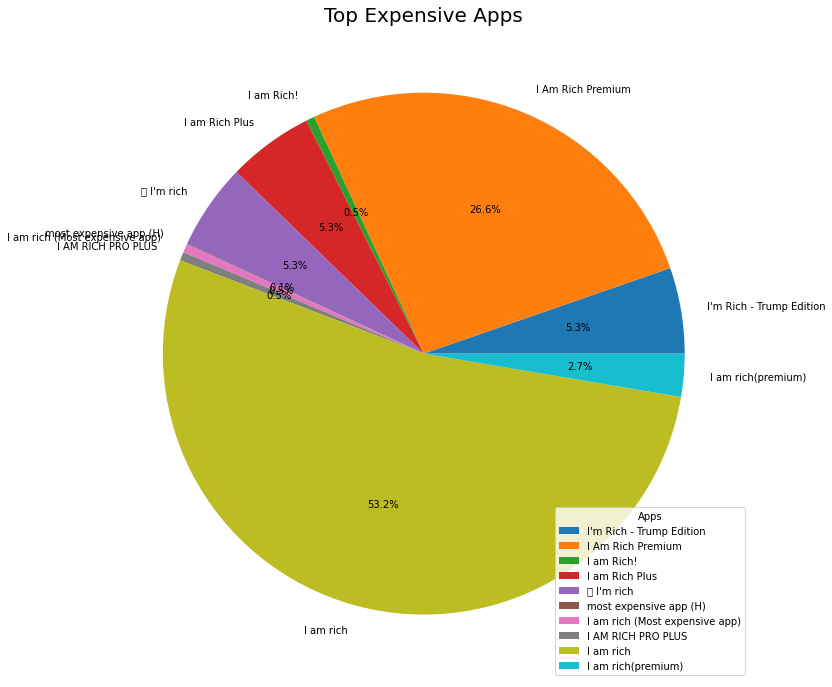

In [68]:
plt.figure(figsize=(15,12));
plt.pie(top_10_paid_apps_by_price.Installs, explode=None, labels=top_10_paid_apps_by_price.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps',size = 20);
plt.legend(top_10_paid_apps_by_price.App, 
           loc="lower right",
           title="Apps",);

In [69]:
#top 10 app by price
top_10_paid_apps_by_price

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4993,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7475.2,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
6646,5356,I Am Rich Premium,FINANCE,4.1,1867,4812.8,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
215,5358,I am Rich!,FINANCE,3.8,93,22528.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
530,5354,I am Rich Plus,FAMILY,4.0,856,8908.8,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
1154,4362,💎 I'm rich,LIFESTYLE,3.8,718,26624.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
1880,4197,most expensive app (H),FAMILY,4.3,6,1536.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
7943,5364,I am rich (Most expensive app),FINANCE,4.1,129,2764.8,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
3887,5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41984.0,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
3929,5351,I am rich,LIFESTYLE,3.8,3547,1843.2,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
2821,5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


### From the above pie chart price percentage distribution of given application.**"I am rich" and "I am Rich Premium"** are the two most used expensive Apps.

## **11. Viewing Genre wise App rating**

In [70]:
# we already have the genre wise all applications ratings data
genre_wise_all_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


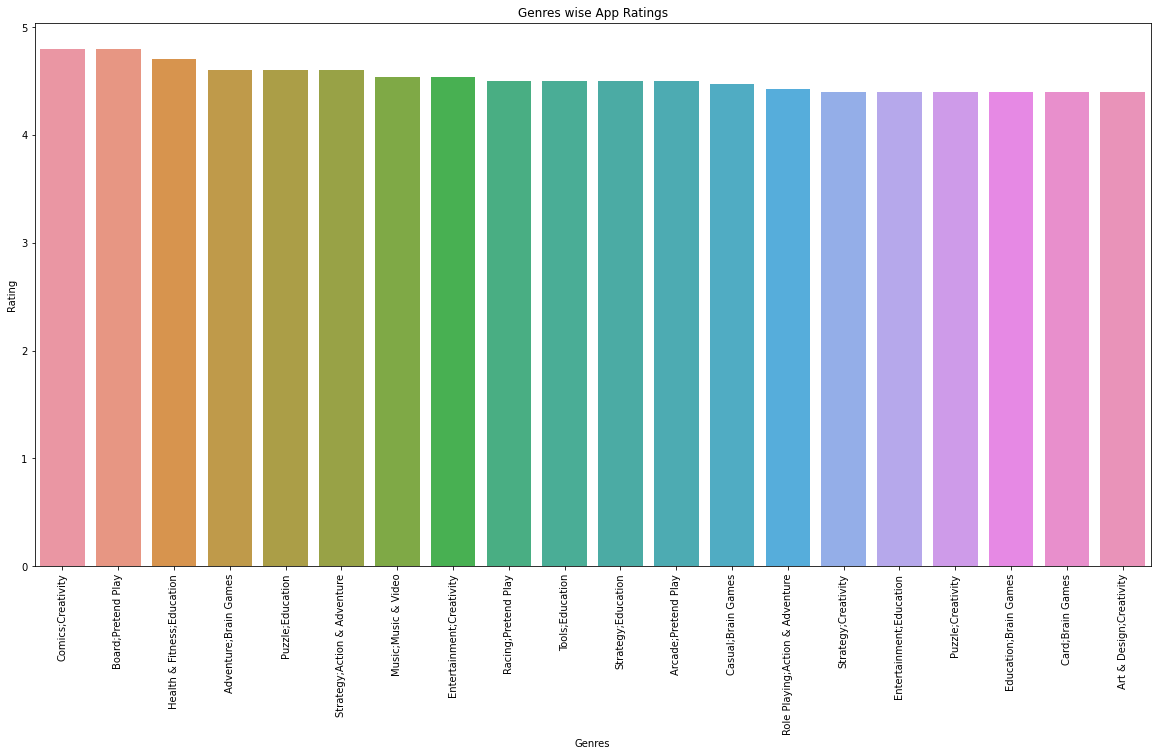

In [71]:
top_20_rated_genres = genre_wise_all_installs_ratings.iloc[0:20]
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
colors = ["red"]
plt.ylabel("Rating")
plt.title("Genres wise App Ratings")
sns.barplot(top_20_rated_genres.Genres, top_20_rated_genres.Rating)
plt.show()

## **12. Size wise Application distributon over all provided data (playstore).**

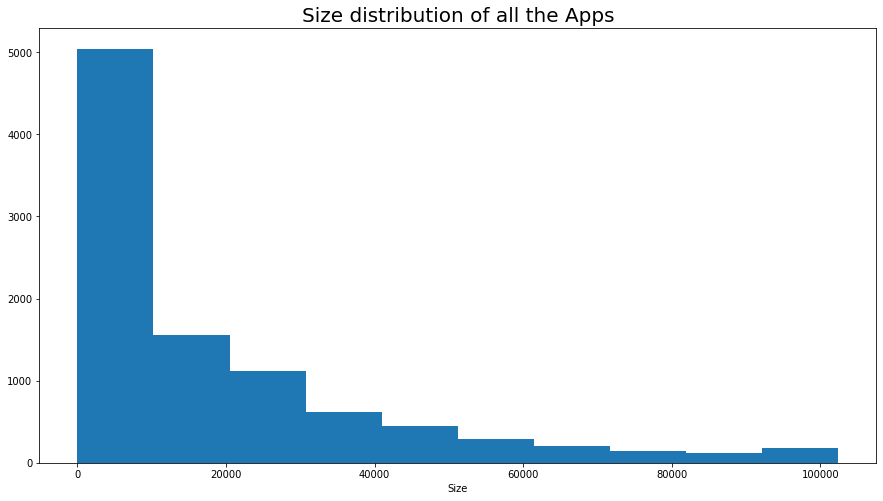

In [72]:
#distribution for size 
plt.xlabel("Size",size=10)
plt.title("Size distribution of all the Apps",size=20)
plt.hist(df_play_store['Size'],bins=10)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

## **13. Comparing Number of apps Age Group(Content rating) wise.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Content Rating')

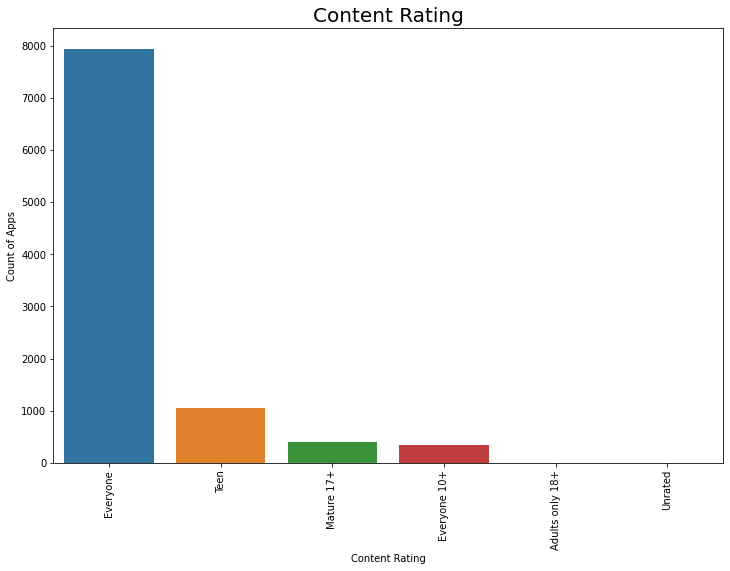

In [73]:
x_data2 = df_play_store['Content Rating'].value_counts().index
y_data2 = df_play_store['Content Rating'].value_counts()

x_data2_axs = []
y_data2_axs = []
for i in range(len(x_data2)):
    x_data2_axs.append(x_data2[i])
    y_data2_axs.append(y_data2[i])
    
# plotting the graph

plt.figure(figsize=(12,8))
sns.barplot(x_data2_axs,y_data2_axs)         
plt.title('Content Rating',size = 20)
plt.xticks(rotation=90)
plt.ylabel('Count of Apps')
plt.xlabel('Content Rating')

In [74]:
df_play_store['Content Rating'].value_counts()

Everyone           7943
Teen               1057
Mature 17+          393
Everyone 10+        336
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

###So we can see from the graph that most of the apps are for everyone (Approx 7900) so that it could capture the most of the customer-base.

## **14. Content Rating (Age Group) based Average Rating of the Apps**

In [75]:
x_content=pd.DataFrame(df_play_store.groupby('Content Rating').agg({'Rating':'mean'}))
x_content=x_content.sort_values('Rating',ascending=False)
x_content

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone 10+,4.235119
Teen,4.234816
Unrated,4.200000
Everyone,4.189324
Mature 17+,4.138168


Text(0.5, 0, 'Average Rating of Apps')

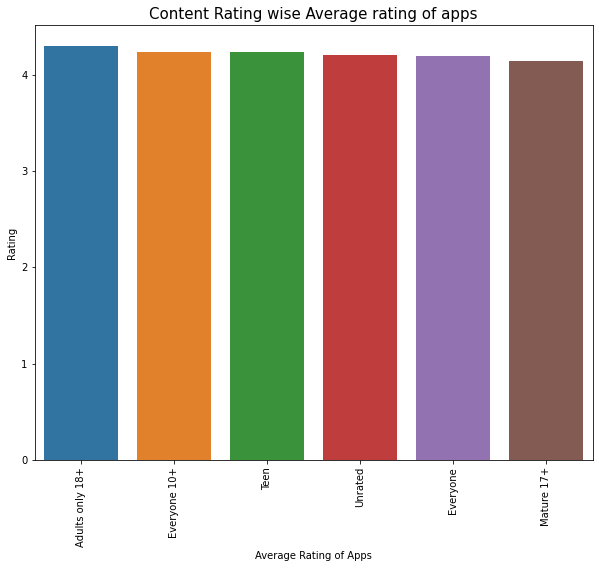

In [76]:

sns.barplot(x=x_content.index,y=x_content['Rating'])        
plt.title('Content Rating wise Average rating of apps',size = 15)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.xlabel('Average Rating of Apps')  

### So from this graph comparison we can see the Apps which have content rating "Adults only 18+" ie. Apps made for adults and above age level 18 have got the Average rating of more than 4.

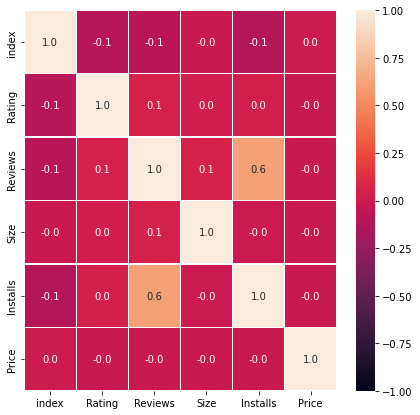

In [77]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_play_store.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax, vmin=-1)
plt.show()

###We can see that installs and reviews have the strongest correlation. This is reasonable because popular apps tends to get more number of reviews.There is no correlation found between installs and other features like size,rating,number of installs and price. There is no correlation between rating and price also.

## **For second dataframe.**

In [78]:
#Creating dataframes for user reviews data
df_user_review = pd.read_csv('/content/drive/MyDrive/Play_Store_Project/User Reviews.csv')

In [79]:
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000



*   ### User review dataset contain column named as translated reviews  with their translated reviews, sentiment, sentiment polarity and sentiment subjectivity.
*   ### Sentiments are like boolean values of user translated reviews having values like 'positive','negetive' and 'neutral'.
*   ### Sentiment Polarity is the calibrated value of translated reviews that varies from -1 to 1.
###1.   For positive it would be in range 0 to 1.
###2.   For negetive it would be -1 to 0.
###3.   For neutral it will be 0.
* ### Sentiment subjectivity is basically pitch of review.The range of pitch is from 0 to 1.If review words are too good or bad it would be rate 1.


In [80]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### From above information half of the values are null. 
###It is better to just omit them rather than replacing it .
###Also if any of the columns are null it wouldn't prove useful as all this columns are mostly related to each other.

In [81]:
#Drop missing values 
df_user_review.dropna(inplace=True)

In [82]:
#checking user df
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [83]:
df_user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [84]:
#check for duplicate
df_user_review[df_user_review.duplicated()].count()

App                       7735
Translated_Review         7735
Sentiment                 7735
Sentiment_Polarity        7735
Sentiment_Subjectivity    7735
dtype: int64

In [85]:
df_user_review[df_user_review.duplicated()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
78,10 Best Foods for You,Good,Positive,0.70,0.600000
79,10 Best Foods for You,Good,Positive,0.70,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000



###Due to the possibility of putting same contest of reviews by different users, we will not drop those values when checking for duplicate rows.

In [86]:
df_user_review['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [87]:
df_user_review['Sentiment'].value_counts('Negative')*100

Positive    64.119486
Negative    22.099019
Neutral     13.781495
Name: Sentiment, dtype: float64

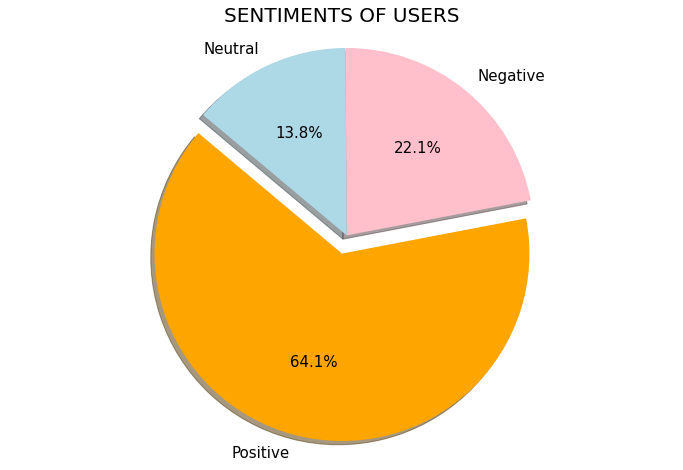

In [88]:
from matplotlib import font_manager
# Data to plot (#Final code for pie chart)
labels = 'Positive', 'Negative','Neutral'
sizes = [64.11, 22.09, 13.79]
colors = ['orange', 'pink', 'lightblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 15})

plt.axis('equal')
plt.title('SENTIMENTS OF USERS',size=20)
plt.show()
plt.rcParams['figure.figsize'] = (15,8)

As we can infer from the pie chart that overall the users have had a positive response to the apps. Which can also be twice confirmed from the maximum number of reviews lying between 4.2-4.6 .

This quantification of sentiment being more indicative towards positive can be used to infer the psychology of the users. There is a more positive outlook towards most of the products and thus an investment seems viable.

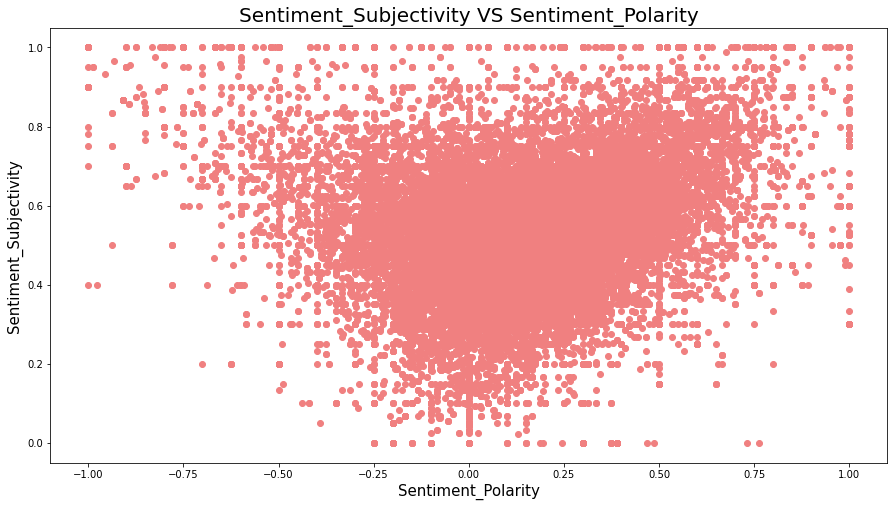

In [89]:
x=df_user_review['Sentiment_Polarity']
y=df_user_review['Sentiment_Subjectivity']
plt.scatter(x,y,color='lightcoral')
plt.title('Sentiment_Subjectivity VS Sentiment_Polarity',size = 20)
plt.rcParams['figure.figsize'] = (12,6)
plt.ylabel('Sentiment_Subjectivity',size = 15)
plt.xlabel('Sentiment_Polarity',size = 15)  
plt.show()

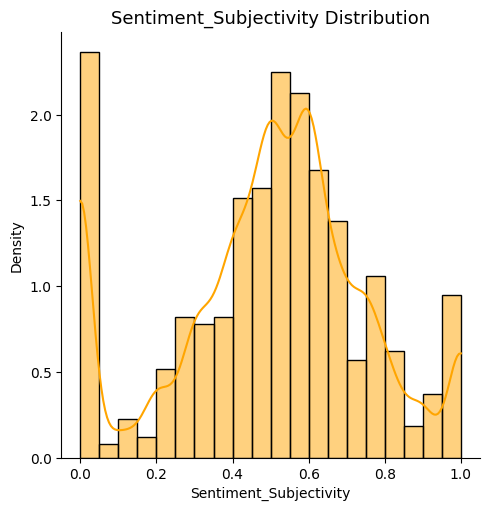

In [90]:
p = sns.displot(data=df_user_review,x= 'Sentiment_Subjectivity',stat = 'density', kde=True,color='orange',bins=20)
p.fig.set_dpi(100)
plt.title('Sentiment_Subjectivity Distribution',size = 13)
plt.show()

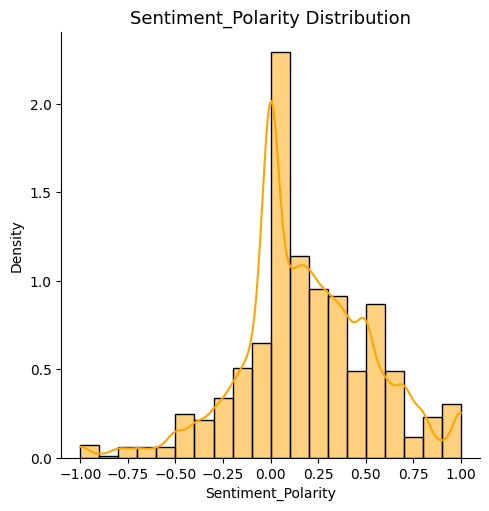

In [91]:
p=sns.displot(data = df_user_review, x='Sentiment_Polarity', stat = 'density', kde=True, color='orange', bins=20)
p.fig.set_dpi(100)
plt.title('Sentiment_Polarity Distribution',size = 13)
plt.show()

### As seen before for negetive and positive values of polarity, subjectivity is high and for neutral subjectivity is low. Basis this we can assume that for neutral polarity, senitments or reviews are less.

### Like person giving avg ratings not interested in giving reviews or reviews are good in pitch. Like wise reviews are mostly given by below avg rating or above are actual and neutral rating/neutral sentiments are just for a sake to give a review.

### In our data we have most of positive reviews. So if required can check our result with counts of positive or negetive sentiments.

## **Adding Sentiments from user dataset.**

In [92]:
df_play_user=pd.merge(df_play_store,df_user_review,on='App',how='left')

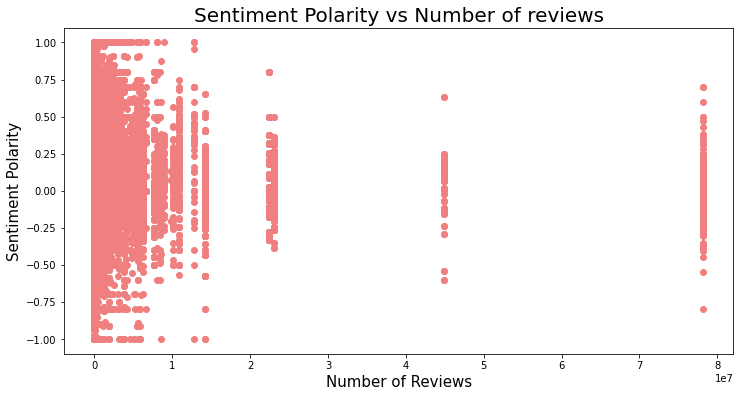

In [93]:
plt.scatter(df_play_user['Reviews'],df_play_user['Sentiment_Polarity'],color='lightcoral')
plt.xlabel('Number of Reviews',size=15)
plt.ylabel('Sentiment Polarity',size=15)
plt.title('Sentiment Polarity vs Number of reviews',size=20)
plt.rcParams['figure.figsize'] = (12,6) 
plt.show()

###From the above plot we can determine that there is no definitive relationship between sentiment polarity and number of reviews. There is a lot of variance in the values of polarity with respect to the number of reviews.

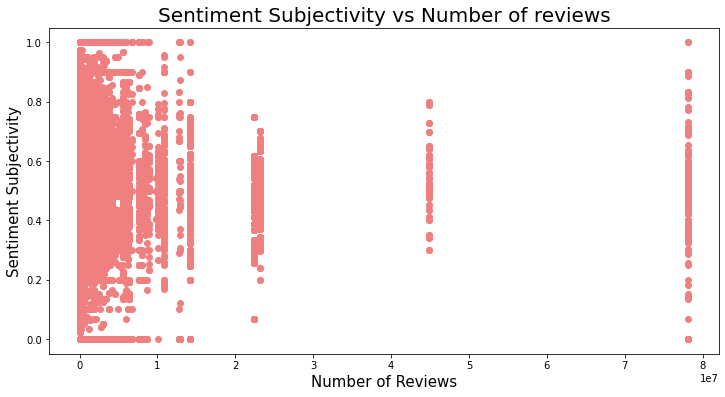

In [94]:
plt.scatter(df_play_user['Reviews'],df_play_user['Sentiment_Subjectivity'],color='lightcoral')
plt.xlabel('Number of Reviews',size=15)
plt.ylabel('Sentiment Subjectivity',size=15)
plt.title('Sentiment Subjectivity vs Number of reviews',size=20)
plt.rcParams['figure.figsize'] = (12,6) 
plt.show()

###From the above plot we can determine that there is no definitive relationship between sentiment subjectivity and number of reviews. There is a lot of variance in the values of subjectivity with respect to the number of reviews.

## **Conclusion:**

**The target of this Play store Data analysis is to know how different parameters can affect the app ratings and reviews and understand how these can effect the Play store app industry as a whole.
So we can conclude that:**

1. Users mostly prefer the free apps. App size doesnot affect the decision of using the paid or free apps much.
2. Family, Games and Tools category have the highest number of apps published on Play store but Highest installation is from the Games category.
3. The apps which have the higher rating above 4 those are actually targetting all the people not a certain age group.
4. Dating, maps, Travel, video player these category apps received the lowest ratings from the user and we know that dating apps have high human interaction dependency, maps, travel apps can produce inaccurate data and there may be lots of video player apps available, so launching a new app in these categories is not recommended.
5. On average the application size is in between 10 MB to 30 MB.
6. Family, Game, Communication, Social, Tools, Medical, Events category Apps have the highest earning. 
7. Also at the same time Medical, Family, Tools, Game category apps are the most expensive apps which actually is clear also because these category of the application market have the most invested money and indeed these are the right  categories to make best profits.
8. Customer ratings actually effect the category to release an app on that category.
9. We can see that most positive sentiment reviews are from most polupar categories.
10. Positive reviews are higher than negative and neutral sentiment reviews.